In [5]:
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import Holt

import paygap

Find median weekly income and calculate proportion of women workers for each occupation. Data from CPS and BLS. 

Read in data

In [6]:
df_2018 = paygap.ReadBLS(filename='../Data/weeklyincome_occupation_gender_clean_2018.xlsx')
df_2018.head()

,Unnamed: 0,Occupation,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings
0,0.0,Total fulltime wage and salary workers,115567.0,886.0,64142.0,973.0,51425.0,789.0
1,2.0,Management professional and related occupations,48808.0,1246.0,23685.0,1468.0,25123.0,1078.0
2,3.0,Management business and financial operations o...,19863.0,1355.0,10668.0,1537.0,9195.0,1168.0
3,4.0,Management occupations,13477.0,1429.0,7754.0,1585.0,5724.0,1236.0
4,5.0,Chief executives,1098.0,2291.0,790.0,2488.0,307.0,1736.0


Calculate the proportion of females in each occupation and store in Series

In [8]:
female_props = (df_2018['2018 Women Number of workers']/df_2018['2018 Total Number of workers'])*100
female_props.head()

0    44.497997
1    51.473119
2    46.292101
3    42.472360
4    27.959927
dtype: float64

Create a new DataFrame that just contains the occupation, median weekly income, and proportion of females

In [10]:
d = {'Occupation': df_2018['Occupation'], 
     'Weekly Pay': df_2018['2018 Total Median weekly earnings'], 
     'Percent Female': female_props}
df_2018_result = pd.DataFrame(d)
df_2018_result.head()

,Occupation,Weekly Pay,Percent Female
0,Total fulltime wage and salary workers,886.0,44.497997
1,Management professional and related occupations,1246.0,51.473119
2,Management business and financial operations o...,1355.0,46.292101
3,Management occupations,1429.0,42.472360
4,Chief executives,2291.0,27.959927


Sort the DataFrame rows by weekly incomes with the higher incomes at the top

In [12]:
df_2018_result = df_2018_result.sort_values(by=['Weekly Pay'], ascending=False)

Display results for highest paid occupations

In [13]:
highest = paygap.ShowTableResult(df_2018_result[:10], title='Percentage of female employees in the 10 highest-paid occupations in America by median weekly pay for full-time workers, 2017.')
highest

Occupation,Weekly Pay,Percent Female
Chief executives,"$2,291",27.96%
Pharmacists,"$2,071",62.74%
Physicians and surgeons,"$2,001",42.56%
Lawyers,"$1,947",40.33%
Computer and information systems managers,"$1,877",25.46%
Software developers applications and systems software,"$1,864",20.30%
Computer programmers,"$1,591",21.26%
Engineers all other,"$1,575",12.31%
Marketing and sales managers,"$1,567",46.42%
Computer and mathematical occupations,"$1,539",24.90%


Display results for lowest paid occupations

In [14]:
lowest = paygap.ShowTableResult(df_2018_result[-10:], title='Percentage of female employees in the 10 lowest-paid occupations in America by median weekly pay for full-time workers, 2017.')
lowest

Occupation,Weekly Pay,Percent Female
Food preparation and serving related occupations,$501,49.70%
Personal care aides,$500,83.21%
Waiters and waitresses,$496,65.56%
Packers and packagers hand,$495,58.16%
Cooks,$486,39.32%
Maids and housekeeping cleaners,$467,87.64%
Cashiers,$465,72.88%
Food preparation workers,$463,56.45%
Dining room and cafeteria attendants and bartender helpers,$447,49.15%
Combined food preparation and serving workers including fast food,$436,56.46%


### Plot women's median weekly earnings as a share of white men's over time for different races.

Read in the CPS data, each row corresponds to a particular gender and race

In [15]:
df_race_raw = paygap.ReadCPS('../Data/weeklyincome_gender_race_1979to2018.xlsx')

In [16]:
df_race_raw.head()

,Category,Annual 1979,Annual 1980,Annual 1981,Annual 1982,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,...,Annual 2009,Annual 2010,Annual 2011,Annual 2012,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018
0,White Men,298.0,320.0,350.0,375.0,387.0,401.0,418.0,433.0,450.0,...,845.0,850.0,856.0,879.0,884.0,897.0,920.0,942.0,971.0,1002.0
1,White Women,184.0,203.0,221.0,242.0,254.0,268.0,281.0,294.0,307.0,...,669.0,684.0,703.0,710.0,722.0,734.0,743.0,766.0,795.0,817.0
2,Black Women,169.0,185.0,206.0,217.0,232.0,241.0,252.0,264.0,276.0,...,582.0,592.0,595.0,599.0,606.0,611.0,615.0,641.0,657.0,654.0
3,Asian Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,779.0,773.0,751.0,770.0,819.0,841.0,877.0,902.0,903.0,937.0
4,Hispanic Women,157.0,172.0,190.0,203.0,215.0,223.0,230.0,241.0,251.0,...,509.0,508.0,518.0,521.0,541.0,548.0,566.0,586.0,603.0,617.0


Generate year range and extract the values of the white male income row

In [17]:
years = np.arange(1979, 2019)
years

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [18]:
white_male_income = df_race_raw.loc[0].values[1:]
white_male_income

array([298.0, 320.0, 350.0, 375.0, 387.0, 401.0, 418.0, 433.0, 450.0,
       465.0, 482.0, 494.0, 506.0, 514.0, 524.0, 547.0, 566.0, 580.0,
       595.0, 615.0, 638.0, 662.0, 689.0, 702.0, 715.0, 732.0, 743.0,
       761.0, 788.0, 825.0, 845.0, 850.0, 856.0, 879.0, 884.0, 897.0,
       920.0, 942.0, 971.0, 1002.0], dtype=object)

Find proportions of female median weekly income to male median weekly income for each year and race

In [19]:
white_female_income_prop = df_race_raw.loc[1].values[1:]/white_male_income
black_female_income_prop = df_race_raw.loc[2].values[1:]/white_male_income
asian_female_income_prop = df_race_raw.loc[3].values[1:]/white_male_income
hispanic_female_income_prop = df_race_raw.loc[4].values[1:]/white_male_income

Create another DataFrame with calculated values

In [20]:
d = {'Years': years, 
     'Asian Women': asian_female_income_prop.astype(float), 
     'White Women': white_female_income_prop.astype(float), 
     'Black Women': black_female_income_prop.astype(float), 
     'Hispanic Women': hispanic_female_income_prop.astype(float)}
df_race = pd.DataFrame(d)
df_race.head()

,Years,Asian Women,White Women,Black Women,Hispanic Women
0,1979,NaN,0.617450,0.567114,0.526846
1,1980,NaN,0.634375,0.578125,0.537500
2,1981,NaN,0.631429,0.588571,0.542857
3,1982,NaN,0.645333,0.578667,0.541333
4,1983,NaN,0.656331,0.599483,0.555556


Plot the columns of the new DataFrame

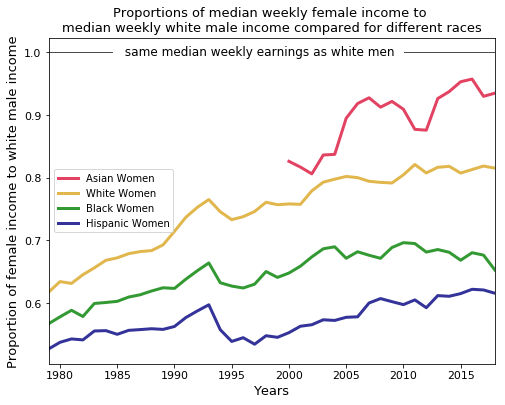

<Figure size 576x432 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot data across different races
for col in df_race:
    if col != 'Years':
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=paygap.GetColor(), alpha=0.8)

# Plot white men income (horizontal line at 1.0)
xs = np.arange(years.min(), years.max() + 1)
ys = np.zeros(len(xs)) + 1
thinkplot.Plot(xs,  ys, color='black', lineWidth=1)
plt.text(x=1985, y=0.995, s='  same median weekly earnings as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)

# Decorate the plot
thinkplot.Config(xlim=(xs.min(), xs.max()),
                 xlabel='Years', 
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

## Prediction

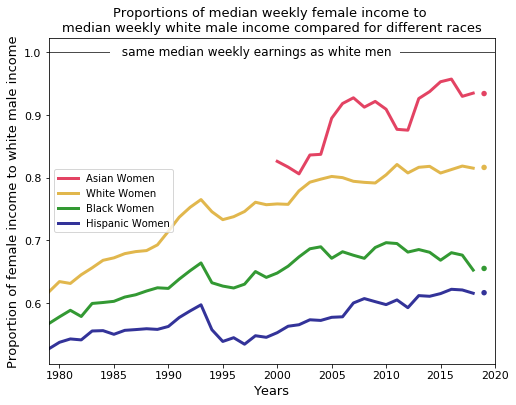

<Figure size 576x432 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot data across different races
for col in df_race:
    if col != 'Years':
        y = df_race[col].dropna()
        y.index -= y.index.min() # Re-start index at 0
        fit = Holt(y, damped=True, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
        fcast = fit.predict(len(y))
        
        color = paygap.GetColor()
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=color, alpha=0.8) # data
        thinkplot.Scatter([2019], fcast, color=color, alpha=0.8) # prediction

# Plot white men income (horizontal line at 1.0)
xs = np.arange(years.min(), years.max() + 3)
ys = np.zeros(len(xs)) + 1
thinkplot.Plot(xs,  ys, color='black', lineWidth=1)
plt.text(x=1985, y=0.995, s='  same median weekly earnings as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)

# Decorate the plot
thinkplot.Config(xlim=(xs.min(), xs.max()),
                 xlabel='Years', 
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

In [23]:
fig.savefig("proportion-female-to-male-income", quality=100, dpi=200)